<a href="https://colab.research.google.com/github/AlbertAkk/creditRiskAnalysis/blob/master/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv('credit_risk.csv')

print(df.head())
print(df.info())
print(df.describe())


   Id  Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
0   0   22   59000      RENT       123.0   PERSONAL   35000  16.02       1   
1   1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   

   Percent_income Default  Cred_length  
0            0.59       Y            3  
1            0.10       N            2  
2            0.57       N            3  
3            0.53       N            2  
4            0.55       Y            4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int6

In [ ]:
# Have missing data in Emp_length and Rate
# Will use imputation for both vars to fill in data with median
# Use median, because there are possibly outliers
# This way we could ensure that the
# imputation process is not biased by the presence of outliers

median_emp_length = df['Emp_length'].median()
df['Emp_length'].fillna(median_emp_length, inplace=True)

median_rate = df['Rate'].median()
df['Rate'].fillna(median_rate, inplace=True)

print(df.head())
print(df.info())


   Id  Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
0   0   22   59000      RENT       123.0   PERSONAL   35000  16.02       1   
1   1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   

   Percent_income Default  Cred_length  
0            0.59       Y            3  
1            0.10       N            2  
2            0.57       N            3  
3            0.53       N            2  
4            0.55       Y            4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int6

In [ ]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

# No duplicates

Duplicate Rows:
Empty DataFrame
Columns: [Id, Age, Income, Home, Emp_length, Intent, Amount, Rate, Status, Percent_income, Default, Cred_length]
Index: []


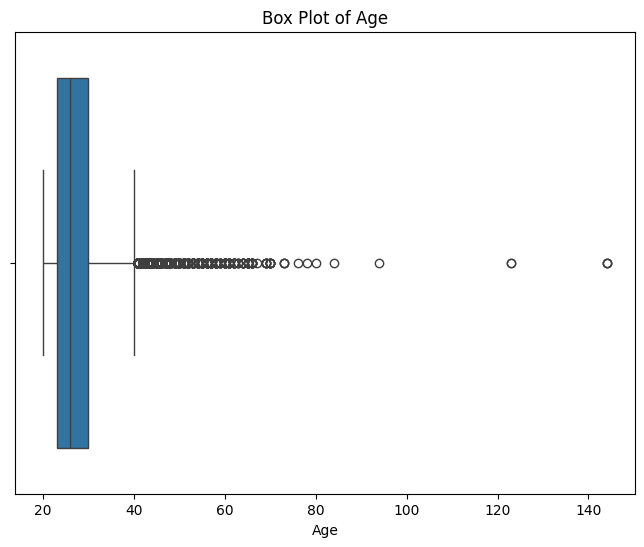

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 32576 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32576 non-null  int64  
 1   Age             32576 non-null  int64  
 2   Income          32576 non-null  int64  
 3   Home            32576 non-null  object 
 4   Emp_length      32576 non-null  float64
 5   Intent          32576 non-null  object 
 6   Amount          32576 non-null  int64  
 7   Rate            32576 non-null  float64
 8   Status          32576 non-null  int64  
 9   Percent_income  32576 non-null  float64
 10  Default         32576 non-null  object 
 11  Cred_length     32576 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.2+ MB
None


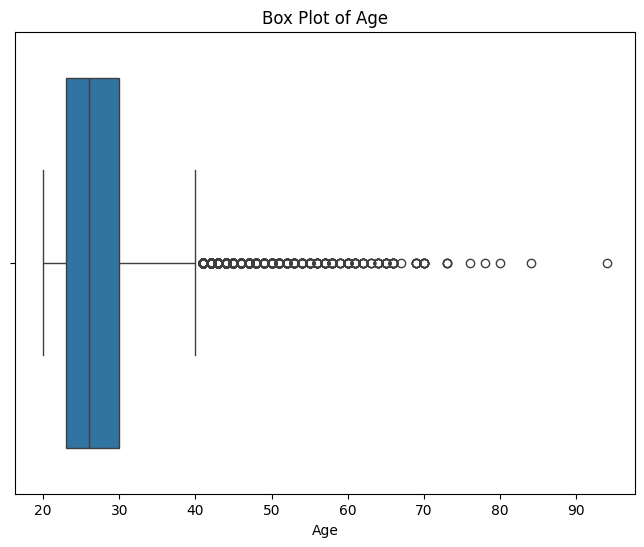

In [ ]:
# As we can see in the plot, we have some outliers
# Based on the description of the dataframe
# there are 3 rows with age 144 and 2 rows with age 123
# We will remove these rows from the dataframe
# because there are overall 32581 enries, so it won't affect the results

df_cleaned = df[~df['Age'].isin([144, 123])]

print(df_cleaned.info())

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# There is one entry with age 93, but this age is quite possible,
# therefore we will not remove it from the dataframe

In [ ]:
# We also have a couple of employees
# that have been working in the company for 123 years
# We remove these outliers

df_cleaned = df[~df['Emp_length'].isin([123])]


In [ ]:
df_cleaned = df_cleaned.copy()

bins = [0, 25, 35, 45, 55, 65, df_cleaned['Age'].max()]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

# Create age groups
df_cleaned.loc[:, 'Age_Group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify
print(df_cleaned.head())


   Id  Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
1   1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   
5   5   21    9900       OWN         2.0    VENTURE    2500   7.14       1   

   Percent_income Default  Cred_length Age_Group  
1            0.10       N            2       <25  
2            0.57       N            3     25-34  
3            0.53       N            2       <25  
4            0.55       Y            4       <25  
5            0.25       N            2       <25  


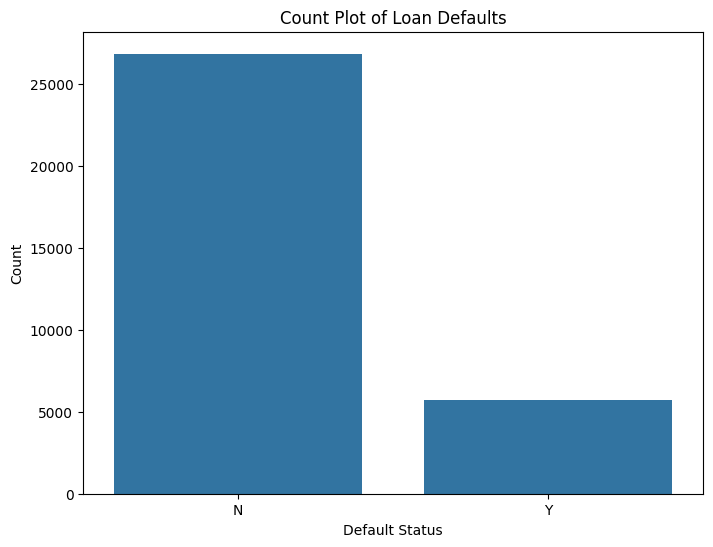

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Default', data=df_cleaned)
plt.title('Count Plot of Loan Defaults')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

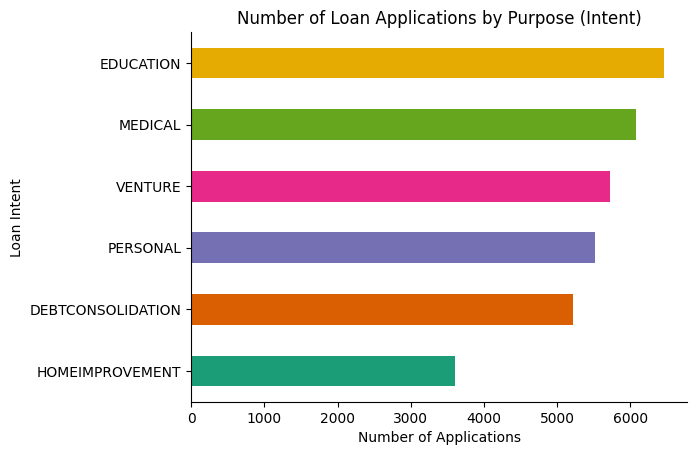

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

grouped_data = df_cleaned.groupby('Intent').size().sort_values(ascending=True)
grouped_data.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Number of Loan Applications by Purpose (Intent)')
plt.xlabel('Number of Applications')
plt.ylabel('Loan Intent')
plt.show()

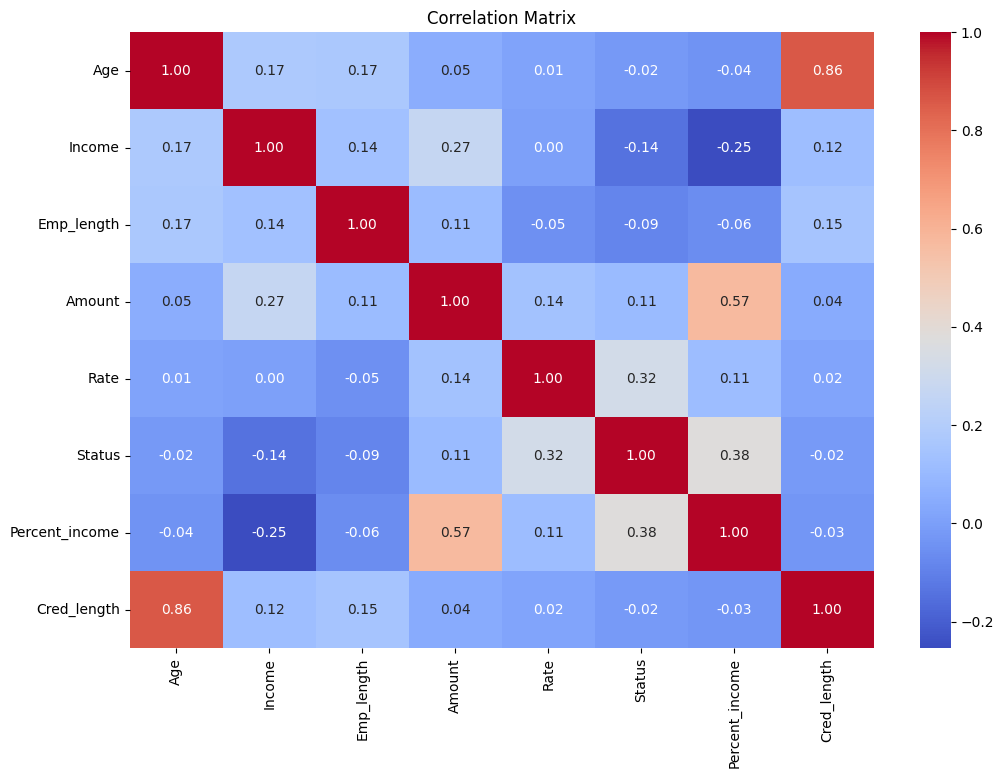

In [ ]:
# Drop non-numerical columns
df_numerical = df_cleaned.select_dtypes(include=[float, int]).drop(columns=['Id'])

# Calculate the correlation matrix
corr_matrix = df_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


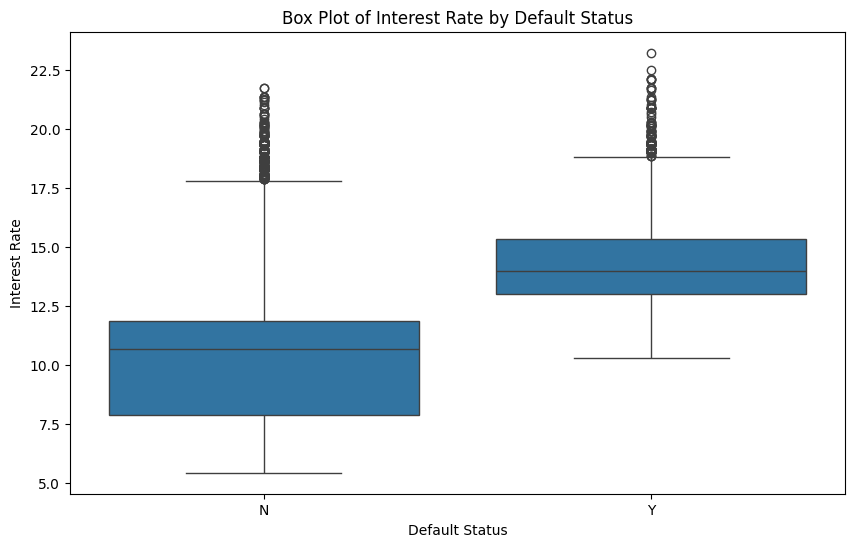

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Default', y='Rate', data=df_cleaned)
plt.title('Box Plot of Interest Rate by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Interest Rate')
plt.show()


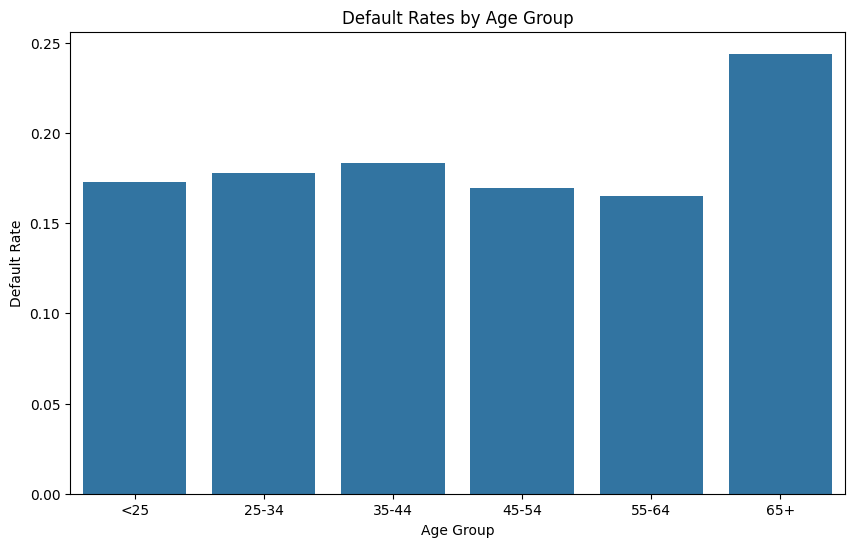

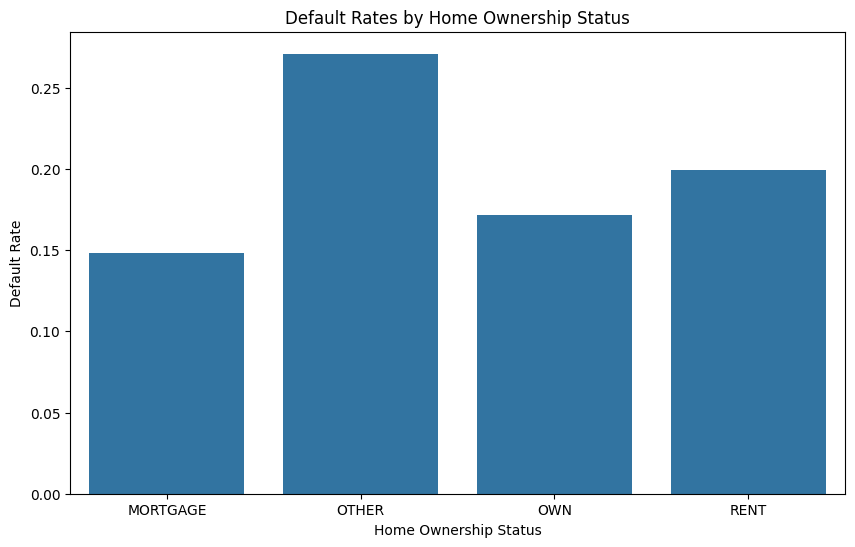

In [ ]:
# Calculate default rates by age group
age_group_default_rate = df_cleaned.groupby('Age_Group')['Default'].value_counts(normalize=True).unstack().fillna(0)

# Calculate default rates by home ownership status
home_ownership_default_rate = df_cleaned.groupby('Home')['Default'].value_counts(normalize=True).unstack().fillna(0)

# Plot default rates by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_default_rate.index, y=age_group_default_rate['Y'])
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.title('Default Rates by Age Group')
plt.show()

# Plot default rates by home ownership status
plt.figure(figsize=(10, 6))
sns.barplot(x=home_ownership_default_rate.index, y=home_ownership_default_rate['Y'])
plt.xlabel('Home Ownership Status')
plt.ylabel('Default Rate')
plt.title('Default Rates by Home Ownership Status')
plt.show()